In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

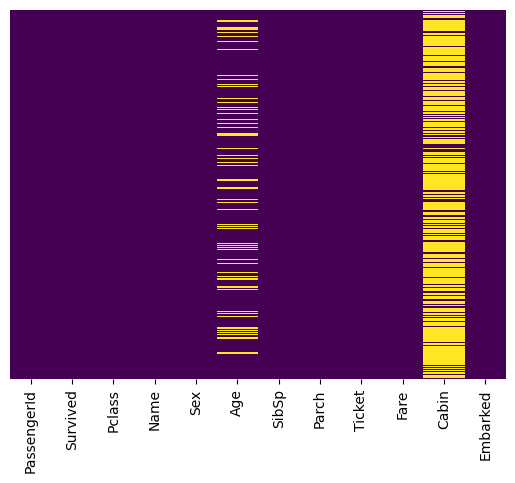

In [6]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

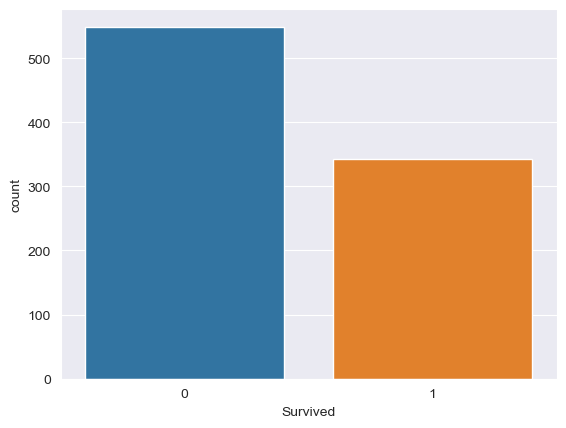

In [7]:
sns.set_style('darkgrid')
sns.countplot(x="Survived",data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

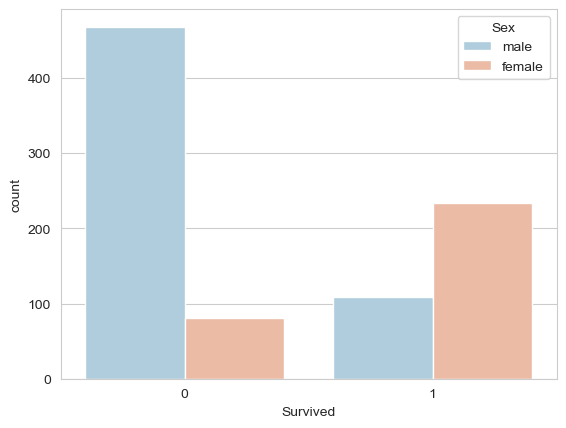

In [8]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue = "Sex",data = titanic, palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

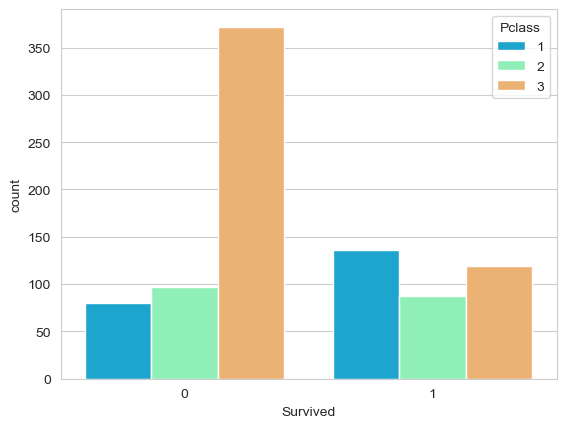

In [9]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",hue = "Pclass",data = titanic, palette = 'rainbow')

C:\Users\negir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

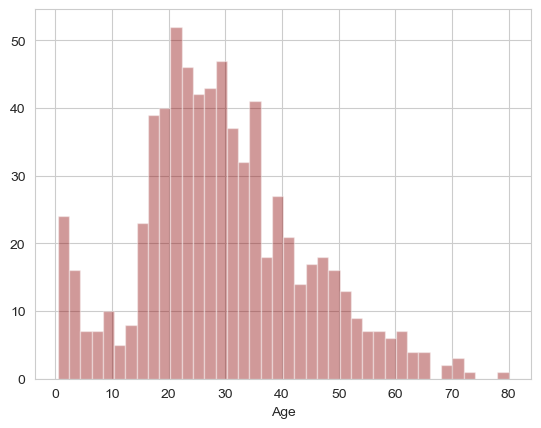

In [10]:
sns.distplot(titanic['Age'].dropna(),kde = False,color = 'darkred', bins= 40)

<AxesSubplot:xlabel='Age'>

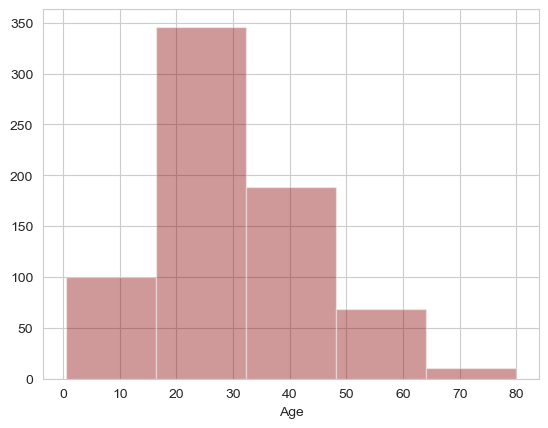

In [11]:
sns.distplot(titanic['Age'].dropna(),kde = False,color = 'darkred', bins= 5)

<AxesSubplot:>

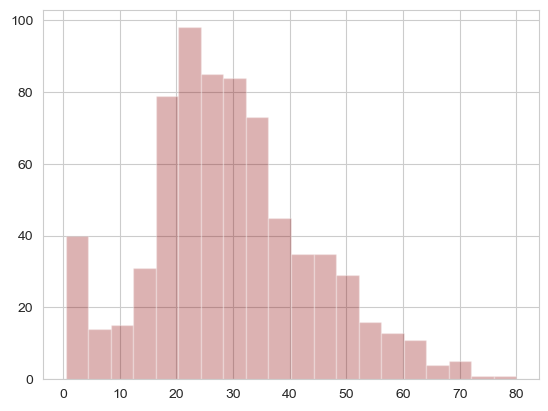

In [12]:
titanic['Age'].hist(bins = 20,color = 'darkred', alpha= 0.3)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

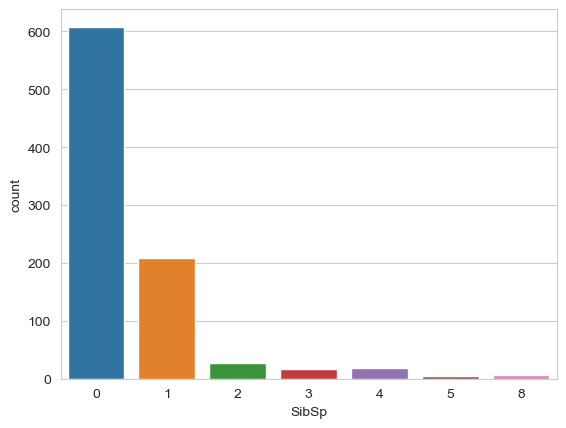

In [13]:
sns.countplot(x='SibSp',data = titanic)

<AxesSubplot:>

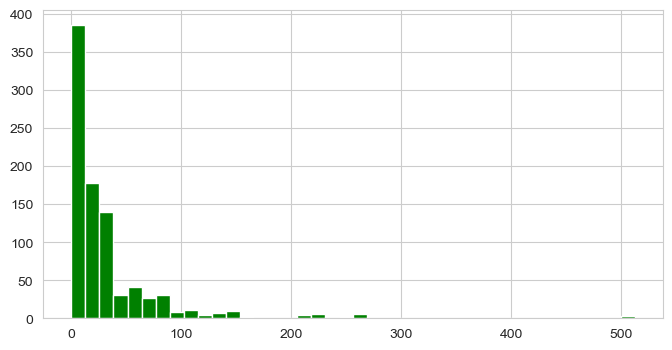

In [14]:
 titanic['Fare'].hist(bins = 40,color = 'green', figsize=(8,4))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

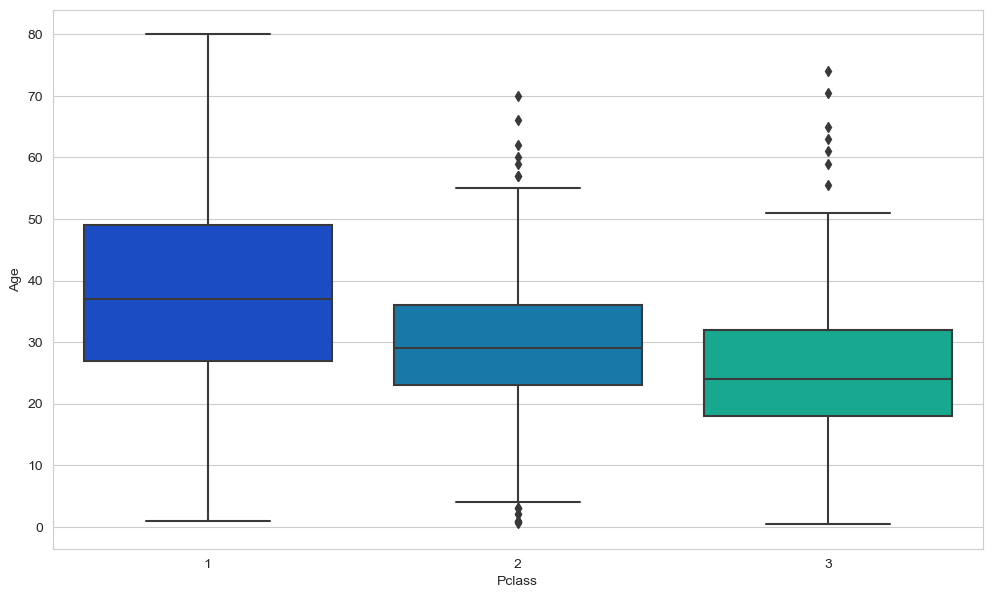

In [15]:
#data cleaning
plt.figure(figsize = (12,7))
sns.boxplot(x= 'Pclass',y ='Age', data = titanic, palette = 'winter')

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 36
        elif Pclass == 2: 
            return 28
        else:
            return 24
    else:
        return Age

In [17]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

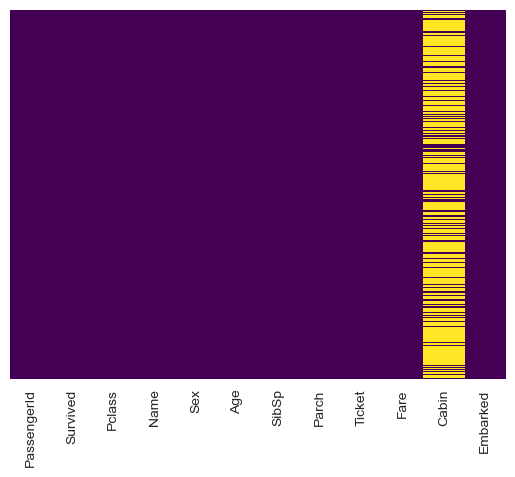

In [18]:
# running heatmap again
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [19]:
# for cabin, we will drop this column as it contains lots of null values
titanic.drop('Cabin', axis=1, inplace=True)

In [20]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
titanic.dropna(inplace=True)

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
pd.get_dummies(titanic['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [24]:
sex = pd.get_dummies(titanic['Sex'],drop_first = True)
embark = pd.get_dummies(titanic['Embarked'],drop_first = True)

In [25]:
titanic.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [26]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [27]:
titanic = pd.concat([titanic,sex,embark],axis=1)

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Building Logistic Regression Model

In [29]:
# train test split
titanic.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [30]:
titanic['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1),titanic['Survived'],test_size=0.20,random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [36]:
logmodel= LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\negir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = logmodel.predict(X_test)

In [38]:
accuracy = confusion_matrix(y_test,predictions)

In [39]:
accuracy

array([[99,  8],
       [26, 45]], dtype=int64)

In [42]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8089887640449438

In [43]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0], dtype=int64)